#Лабораторная работа № 4. Интерполирование и интегрирование
 Вариант №5 \\
 Завадский Никита Валерьевич

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#1
Используя интерполяционную формулу Лагранжа для неравноотстоящих узлов
1. построить многочлен Лагранжа (вывести формулу)
2. вывести график многочлена Лагранжа на заданном промежутке
3. вычислить значения функции при данных значениях аргумента
4. отметить на графике (разными цветами) узлы интерполяции, а также предсказанные значения функции.

В работе должна обязательно присутствовать теоретическая часть, формулы для нахождения многочлена Лагранжа должны быть
записаны Latex-формулам.

Функция задана таблицей:
\begin{array}{|c|c|}
\hline
x & 0.35 & 0.41 & 0.47 & 0.51 & 0.56 & 0.64 \\
\hline
y & 2.73851 & 2.30080 & 1.96864 & 1.78776 & 1.59502 & 1.34310 \\
 \hline
\end{array}

Построить многочлен Лагранжа. Вычислить значение функции в точках:
\begin{array}{|c|c|}
\hline
x & 0.256 & 0.453 & 0.482 & 0.552 & 0.436 \\
\hline
\end{array}



---


**Интерполяционная формула Лагранжа.** Пусть $x_i, i=\overline{0,n}$ - произвольные узлы, а $y_i=f(x_i)$ значения функции $f(x)$. Многочленом степени $n$, принимающим в точках $x_i$ значения $y_i$ является интерполяционный многочлен Лагранжа:
$$L_n(x) = \sum_{i=0}^n y_i \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j} $$
Коэффицентом Лагранжа называется выражение: $$l_i(x)=\prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}$$
$$$$
**Многочлен Лагранжа для данного задания.** Многочлен Лагранжа имеет вид: $$L_5(x)=y_0*l_0(x)+y_1*l_1(x)+y_2*l_2(x)+y_3*l_3(x)+y_4*l_4(x)+y_5*l_5(x),$$
где:
$$l_0=\frac{(x-x_1)(x-x_2)(x-x_3)(x-x_4)(x-x_5)}{(x_0-x_1)(x_0-x_2)(x_0-x_3)(x_0-x_4)(x_0-x_5)}, \\
l_1=\frac{(x-x_0)(x-x_2)(x-x_3)(x-x_4)(x-x_5)}{(x_1-x_0)(x_1-x_2)(x_1-x_3)(x_1-x_4)(x_1-x_5)}$$ и так далее для остальных.


---

Напишем функцию, которая будет вычислять $L_n(x)$

In [22]:
def L(x,X,Y):
  n = len(X)
  L = 0.0
  for i in range(n):
    l = Y[i]
    for j in range(n):
      if i != j:
        l *= (x - X[j])/(X[i] - X[j])
    L += l
  return L

Вычисляем значения функции при в заданных точках

In [23]:
#функция задана точками
X = np.array([0.35, 0.41, 0.47, 0.51, 0.56, 0.64])
Y = np.array([2.73851, 2.30080, 1.96864, 1.78776, 1.59502, 1.34310])

#заданные точки
x = np.array([0.256, 0.453, 0.482, 0.552, 0.436])
y = np.array([L(i, X, Y) for i in x])

print(y)

[3.7779333  2.05439959 1.91148232 1.62373433 2.14636944]


рисуем график функции и отмечаем на нем узлы и предсказанные значения

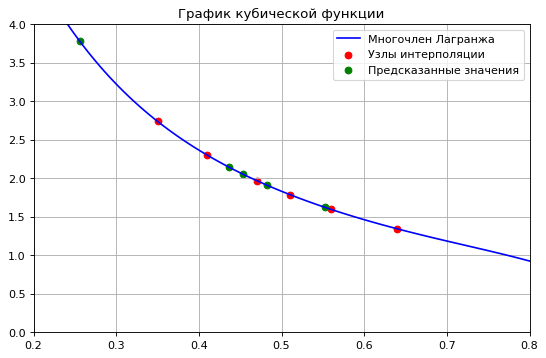

In [39]:
plt.figure(figsize=(8, 5), dpi=80)

x_plot = np.linspace(0.2, 0.8, 100)
y_plot = [L(i, X, Y) for i in x_plot]

plt.plot(x_plot, y_plot, label='Многочлен Лагранжа', color='blue')
plt.scatter(X, Y, color='red', label='Узлы интерполяции')
plt.scatter(x, y, color='green', label='Предсказанные значения')
plt.title('График кубической функции')
plt.ylim(0, 4)
plt.xlim(0.2, 0.8)
plt.grid()
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

#2
Для вычисления воспользуйтесь формулой
$$
M\frac{|b-a|h^2}{12}<\epsilon, \quad M=max|f''(x)|,  \quad x \in [a,b]
$$
Шаг $h$ следует выбирать с учётом дополнительного учловия: отрезок интегрирования должен разбиваться на число частей, кратное 4. Вычисления шага $h$ должный присутствовать в лабораторной работе, в текстовом блоке. Текстовый блок содержит Latex-формулы.

Вычислите интеграл по формуле Симпсона с шагами $2h$ и $h$:
$$
\int_a^b f(x)dx \approx \frac{h}{3} (y_0+y_{2m}+4(y_1+y_3+...+y_{2m-1}) + 2(y_2+y_4+...+y_{2m_2})), \quad y_i = f(x_i)
$$

Дайте уточненную оценку погрешности по прравилу Рунге для формуды Симпсона:
$$
\Delta \approx \frac{1}{15} |I_n-I_{2n}|
$$

Найдите значение интеграла с помощью функций Python.

Вычислите определённый интеграл по формуле Ньютона-Лейбница. (вычисления должны присутствовать в текстовом блоке). Сравните приближённые значения интеграла с точным.

\begin{array}{|c|c|}
\hline
f(x) & a & b \\
\hline
x^2ln(X) & 1 & 2 \\
\hline
\end{array}